In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [30]:
df=pd.read_csv("Zomato-data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [89]:
df.shape



(148, 7)

In [91]:

df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [93]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [95]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 1.0, 'Null Values Heatmap')

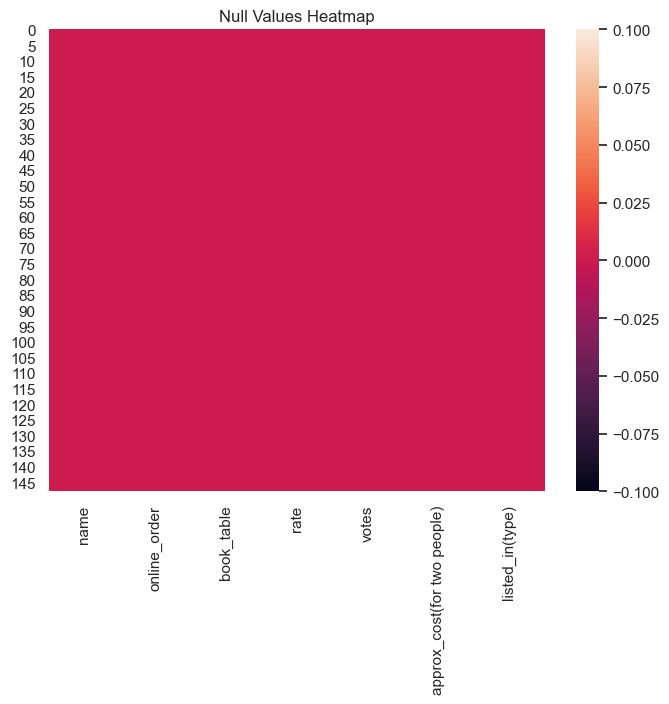

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull())
plt.title('Null Values Heatmap')

In [106]:
(df==np.inf).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [114]:
df['name']=df['name'].astype('string')


In [116]:
df['listed_in(type)']=df['listed_in(type)'].astype('string')


In [120]:
Q1=df['votes'].quantile(0.25)
Q3=df['votes'].quantile(0.75)
IQR=Q3-Q1
upperlimit=Q3+1.5*IQR
df['votes']=df['votes'].apply(lambda x:min(x,upperlimit))

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_14648\2633575477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['votes'],palette='Set2')


<Axes: ylabel='votes'>

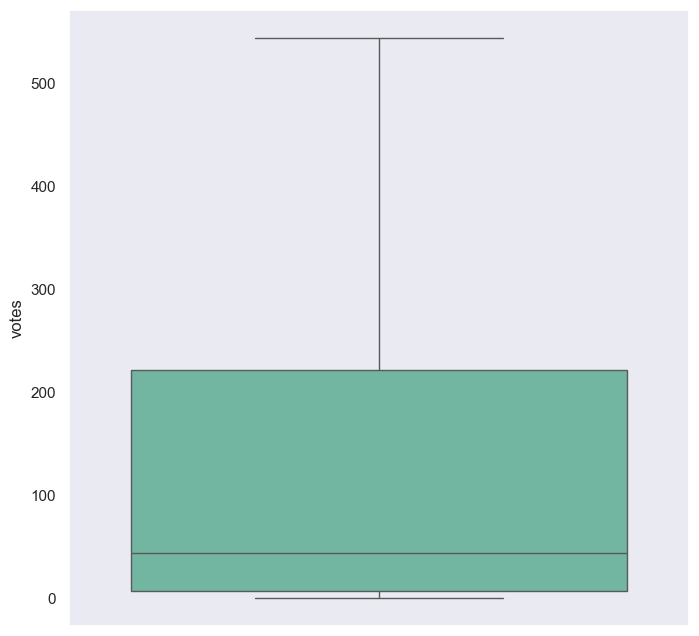

In [126]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df['votes'],palette='Set2')

<Axes: ylabel='count'>

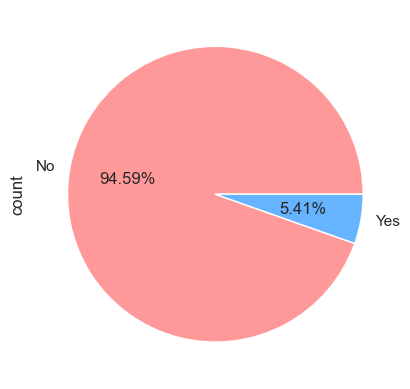

In [131]:
df['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['#ff9999','#66b3ff','#99ff99'])

<Axes: ylabel='count'>

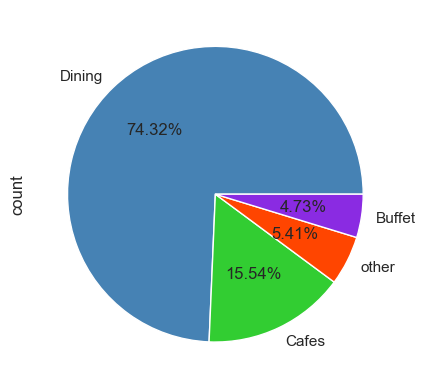

In [133]:
df['listed_in(type)'].value_counts().plot.pie(autopct='%.2f%%',colors=['#4682b4', '#32cd32', '#ff4500', '#8a2be2'])

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

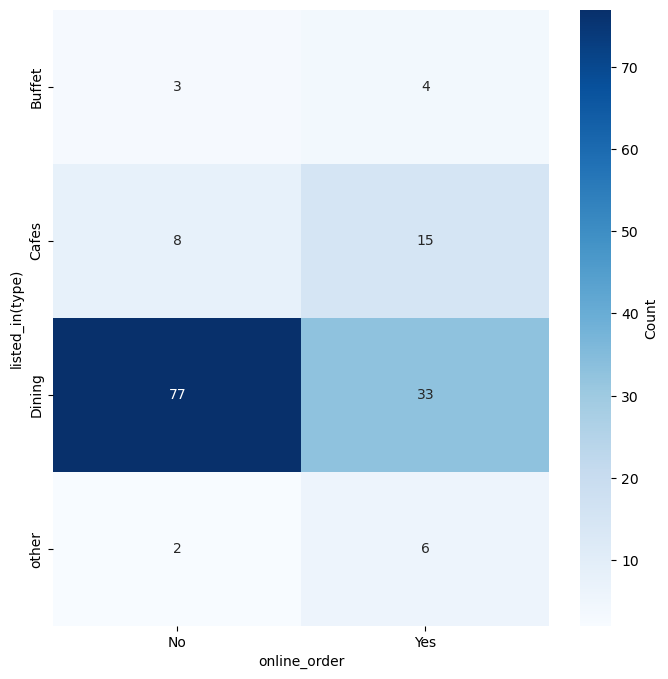

In [13]:
cross_tab=pd.crosstab(df['listed_in(type)'],df['online_order'])
plt.figure(figsize=(8,8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar_kws={'label': 'Count'})

In [15]:
pd.crosstab(df['online_order'],df['listed_in(type)'])

listed_in(type),Buffet,Cafes,Dining,other
online_order,,,,
No,3,8,77,2
Yes,4,15,33,6


<Axes: xlabel='online_order', ylabel='count'>

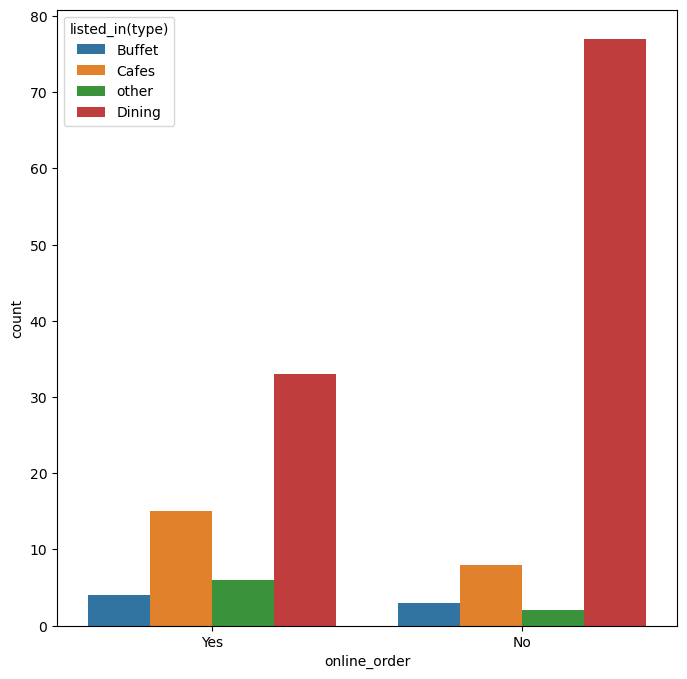

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x='online_order',data=df,hue='listed_in(type)')

In [21]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [23]:
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,1,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,0,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,0,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,0,3.7/5,88,300,Buffet
4,Grand Village,No,0,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,0,3.3/5,0,100,Dining
144,New Indraprasta,No,0,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,0,4.0/5,771,450,Dining
146,Darbar,No,0,3.0/5,98,800,Dining


<Axes: ylabel='count'>

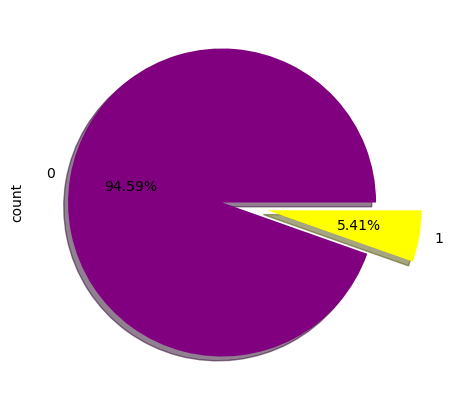

In [39]:
plt.figure(figsize=(5,5))
df['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['purple', 'yellow'],explode=[0,0.3],shadow=True)

In [43]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: ylabel='count'>

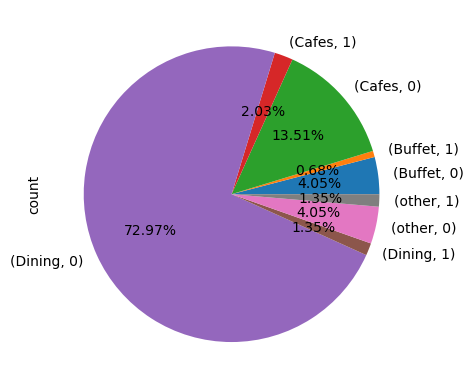

In [51]:
(df.groupby('listed_in(type)')['book_table']).value_counts().plot.pie(autopct='%.2f%%')

Text(0, 0.5, 'Count')

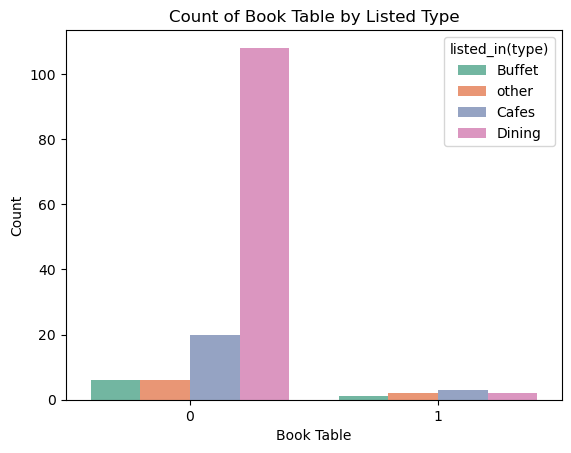

In [53]:
sns.countplot(x='book_table', data=df, hue='listed_in(type)', palette='Set2')
plt.title("Count of Book Table by Listed Type")
plt.xlabel("Book Table")
plt.ylabel("Count")

In [55]:
df.isna().any()


name                           False
online_order                   False
book_table                     False
rate                           False
votes                          False
approx_cost(for two people)    False
listed_in(type)                False
dtype: bool

In [57]:
df.isna().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [59]:
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [61]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool